In [6]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from textblob import TextBlob
from sklearn.metrics import silhouette_score
from nltk.stem import PorterStemmer

In [7]:
data = pd.read_csv("E:\\tripAdvisorReview_project\\New_Delhi_reviews.csv") 

In [8]:
data.head()

,rating_review,review_full
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."


In [9]:
data.columns

Index(['rating_review', 'review_full'], dtype='object')

In [10]:
data.isnull().sum()

rating_review    0
review_full      2
dtype: int64

In [11]:
# Impute missing values for categorical columns with their mode (most frequent value)
categorical_features = ['review_full']

for col in categorical_features:
    data[col] = data[col].fillna(data[col].mode()[0])

In [12]:
data.isnull().sum()

rating_review    0
review_full      0
dtype: int64

In [13]:
data.shape

(147581, 2)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147581 entries, 0 to 147580
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating_review  147581 non-null  int64 
 1   review_full    147581 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


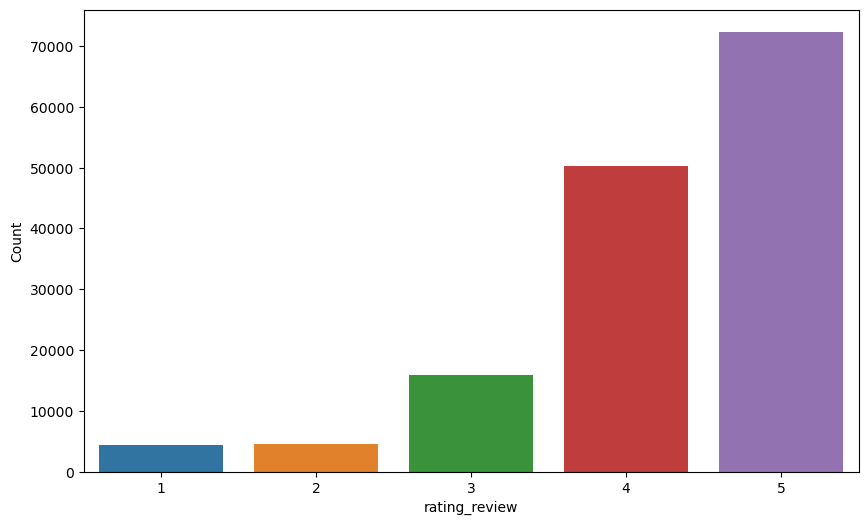

In [15]:
#using count plot to visualize the total counts of each rating
plt.figure(figsize=(10, 6))
sns.countplot(x='rating_review', data=data)
plt.xlabel('rating_review')
plt.ylabel('Count')
plt.show()

In [16]:
data.review_full[0]

"Totally in love with the Auro of the place, really beautiful and quite fancy at the same time. The ambience is very pure and gives a sense of positivity throughout. Outdoor and indoor interior are quite quaint and cute. Love the open kitchen idea and there whole marketplace ideology. Due to coronovirus they specifically use disposable cutlery to keep the pandemic in mind taking all the precautionary measures from the beginning of the place with the mask on their staff and using good sanitisation. The food is really amazing specially the pizza straight from the oven and the hummus and pita bread are quite delicious too. If you're looking for a classy yet soothing Italian place in Delhi,Fatjar is a go to for you!"

In [17]:
data.review_full[1]

'I went this bar 8 days regularly with my husband.. we are fully satisfied by the services. Staff is very good (vitoni and amen) they both served us daily . Will surely visit again. Highly recommended ❣️'

In [18]:
data.review_full[2]

'We were few friends and was a birthday celebration. The food was so good in taste and it was really fresh. We all loved it and highly recomment.'

Data Cleaning

1.convert into lower case
2.Remove alpha numeric
3.Remove stop words
4.Remove punctuations
5.Stemming
6.Lemmatization


In [19]:
stopword_list = stopwords.words('english')
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
import string

In [21]:
exclude = string.punctuation

In [22]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [24]:
def remove_stopwords(text):
    data = [word for word in text.split() if word not in stopword_list]
    return " ".join(data)

In [25]:
stemmer = PorterStemmer()
def stemming(text):
    data = [stemmer.stem(word) for word in text.split()]
    return " ".join(data)   

In [26]:
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    data = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(data)
def tfidf_features_transform(tfidf,df):
    tfidf_matrix = tfidf.transform(df['review']) 
    return tfidf_matrix.toarray()

In [27]:

def text_cleaning(data):
    data["review"] = data['review_full'].copy()
    data['review_full'] = data['review_full'].str.lower()
    data['review_full'] = data['review_full'].apply(remove_punc)
    data['review_full'] = data['review_full'].apply(remove_stopwords)
    data['review_full'] = data['review_full'].apply(stemming)
    data['review_full'] = data['review_full'].apply(lemmatization)
    return data

In [28]:
print(data.columns)


Index(['rating_review', 'review_full'], dtype='object')


In [29]:
data = text_cleaning(data)

In [30]:
data.head()

,rating_review,review_full,review
0,5,total love auro place realli beauti quit fanci...,"Totally in love with the Auro of the place, re..."
1,5,went bar 8 day regularli husband fulli satisfi...,I went this bar 8 days regularly with my husba...
2,5,friend birthday celebr food good tast realli f...,We were few friends and was a birthday celebra...
3,5,fatjar cafe market perfect place casual lunch ...,Fatjar Cafe and Market is the perfect place fo...
4,5,hey guy crave pizza search visit cafe ye highl...,"Hey Guys, if you are craving for pizza and sea..."


In [31]:
data.review_full[0]

'total love auro place realli beauti quit fanci time ambienc pure give sen posit throughout outdoor indoor interior quit quaint cute love open kitchen idea whole marketplac ideolog due coronoviru specif use dispos cutleri keep pandem mind take precautionari measur begin place mask staff use good sanitis food realli amaz special pizza straight oven hummu pita bread quit delici your look classi yet sooth italian place delhifatjar go'

In [32]:
data.review_full[1]

'went bar 8 day regularli husband fulli satisfi servic staff good vitoni amen serv u daili sure visit highli recommend ❣️'

In [33]:
data.review_full[2]

'friend birthday celebr food good tast realli fresh love highli recom'

In [34]:
data.review_full[3]

'fatjar cafe market perfect place casual lunch love one ambienc delight food total best thing place purchas choos oliv lot directli place take prevent measur spread covid19 say without hesit far safest place felt look action ✨'

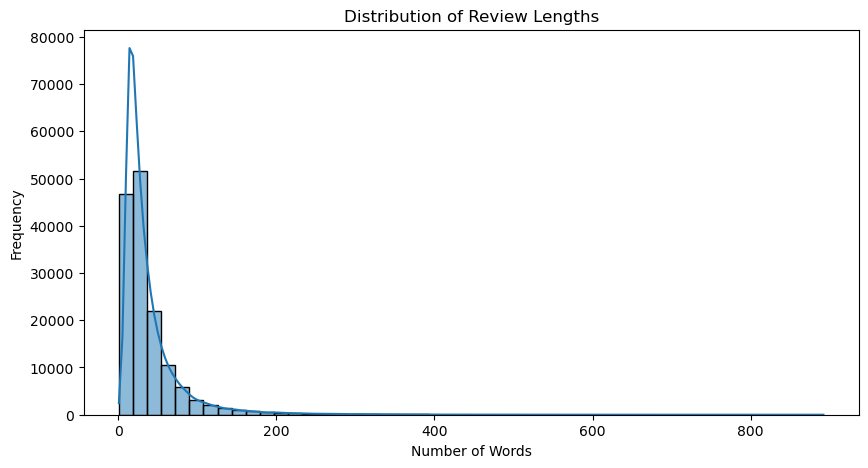

In [35]:

data['review_length'] = data['review_full'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(data['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [36]:
data['sentiment'] = data['review_full'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [37]:
#combine all negative rereviews into a single string
neg_reviews = " ".join([review for review in data[data['review_full'].str.contains('negative', na=False)]['review']])
neg_reviews = neg_reviews.lower().split()

#combine all positive rereviews into a single string
pos_reviews = " ".join([review for review in data[data['review_full'].str.contains('positive', na=False)]['review']])
pos_reviews = pos_reviews.lower().split()


In [38]:
# assuming  neg_reviews and pos_reviews are lists of words from the rereviews
#convert lists to sets for unique words
set_neg_reviews = set(neg_reviews)
set_pos_reviews = set(pos_reviews)

#find unique negative & possitive words using set difference
unique_negative = set_neg_reviews - set_pos_reviews

unique_positive = set_pos_reviews - set_neg_reviews
# join the unique words back into strings
unique_negative = " ".join(unique_negative)
unique_positive = " ".join(unique_positive)


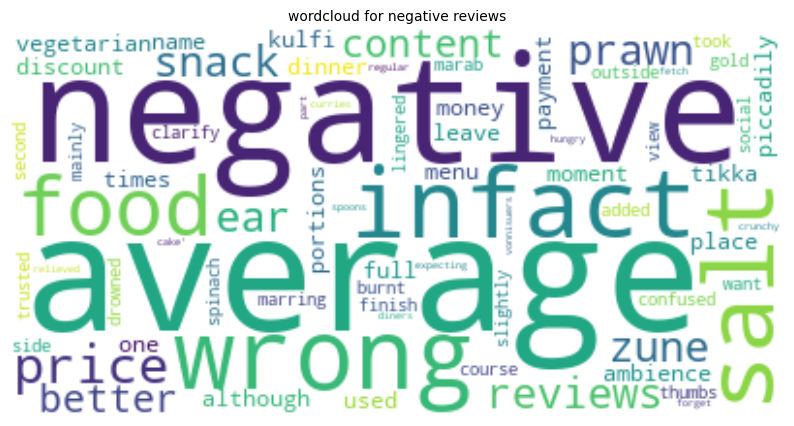

In [39]:
# Initialize the WordCloud object
wc = WordCloud(background_color='white', max_words=70)

# Generate the word cloud from the reviews
wordcloud = wc.generate(unique_negative)

# Plot the WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('wordcloud for negative reviews',fontsize=10)
plt.axis('off')
plt.show()

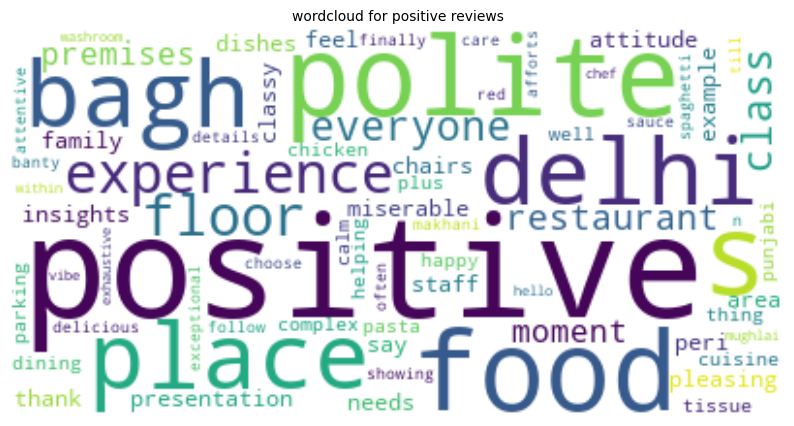

In [40]:
# Initialize the WordCloud object
wc = WordCloud(background_color='white', max_words=70)

# Generate the word cloud from the reviews
wordcloud = wc.generate(unique_positive)

# Plot the WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('wordcloud for positive reviews',fontsize=10)
plt.axis('off')
plt.show()


In [41]:
tfidf = TfidfVectorizer(max_features=3000, min_df=5, max_df=0.8, ngram_range=(1, 2))
X = tfidf.fit_transform(data['review_full'])


In [42]:
from sklearn.decomposition import TruncatedSVD

# Step 1: Reduce TF-IDF dimensionality
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X)  # X is your TF-IDF matrix

# Step 2: Faster KMeans + Silhouette on reduced data
sil_scores = []

for k in range(2, 30):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, labels, sample_size=1000)  # Sample speeds up
    sil_scores.append(score)

# Step 3: Find optimal k
optimal_k = sil_scores.index(max(sil_scores)) + 20
print(f"Optimal number of clusters: {optimal_k}")


Optimal number of clusters: 20


In [43]:
# Final KMeans model
kmeans = KMeans(n_clusters=28, random_state=0,n_init='auto')
kmeans.fit(X)
data['cluster'] = kmeans.labels_

In [44]:

# Assign Sentiment Labels to Clusters
cluster_sentiment = data.groupby('cluster')['sentiment'].mean()
cluster_labels = ['Positive' if val > 0 else 'Negative' for val in cluster_sentiment]

In [45]:
# Print Themes with Sentiment Labels


terms = tfidf.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("\n=== Cluster Themes with Sentiment Labels ===")
for i in range(optimal_k):
    top_terms = [terms[ind] for ind in order_centroids[i, : 7]]
    sentiment_label = cluster_labels[i]
    print(f"\nCluster {i} ({sentiment_label}):")
    print("Top words:", ", ".join(top_terms))


=== Cluster Themes with Sentiment Labels ===

Cluster 0 (Positive):
Top words: bukhara, dal, dal bukhara, food, restaur, naan, best

Cluster 1 (Positive):
Top words: qualiti, food, food qualiti, qualiti food, good, servic, place

Cluster 2 (Positive):
Top words: dine, fine dine, fine, dine experi, experi, restaur, food

Cluster 3 (Positive):
Top words: order, tabl, time, food, place, wait, one

Cluster 4 (Positive):
Top words: love, place, food, love food, love place, amaz, servic

Cluster 5 (Positive):
Top words: visit, must visit, must, place, visit place, food, good

Cluster 6 (Positive):
Top words: excel, servic, excel servic, food, food excel, excel food, servic excel

Cluster 7 (Positive):
Top words: staff, friendli, help, food, staff friendli, good, servic

Cluster 8 (Positive):
Top words: breakfast, buffet, good, stay, servic, breakfast buffet, hotel

Cluster 9 (Positive):
Top words: good, food, food good, servic, good food, place, good servic

Cluster 10 (Positive):
Top words

In [46]:
import pickle as pkl

In [47]:
pkl.dump(kmeans,open('kmeans_model.pkl','wb'))

In [48]:
pkl.dump(tfidf,open('tfidf_vectorizer.pkl','wb'))

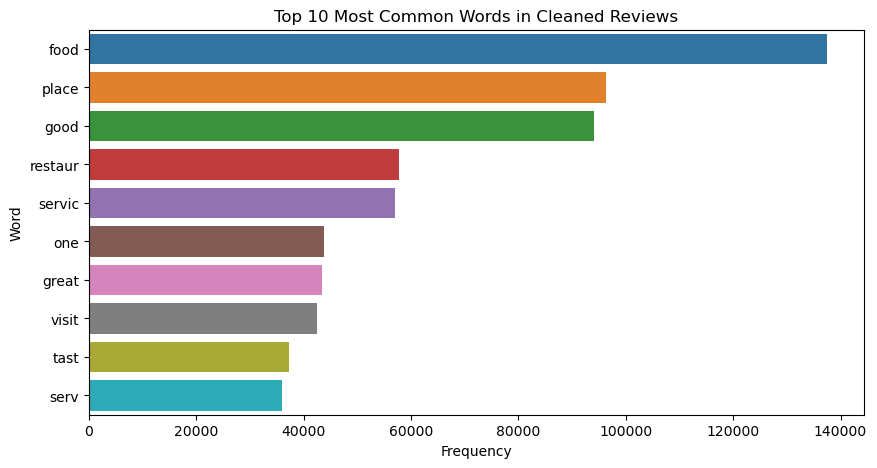

In [50]:
from collections import Counter

all_words = ' '.join(data['review_full']).split()
word_freq = Counter(all_words)
cluster_keywords = word_freq.most_common(10)

# Convert to DataFrame for plotting
common_df = pd.DataFrame(cluster_keywords, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=common_df)
plt.title("Top 10 Most Common Words in Cleaned Reviews")
plt.show()


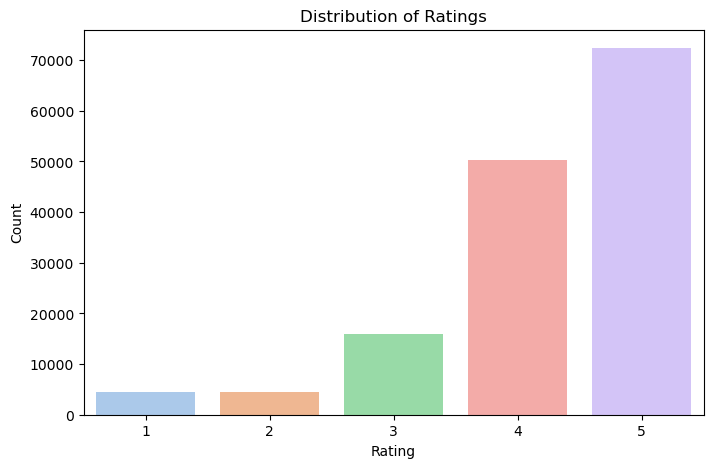

Rating Value Counts:
5    72390
4    50248
3    15936
2     4552
1     4455
Name: rating_review, dtype: int64


In [52]:
if 'rating_review' in data.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x='rating_review', data=data, palette='pastel')
    plt.title("Distribution of Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.show()
    
    print("Rating Value Counts:")
    print(data['rating_review'].value_counts())


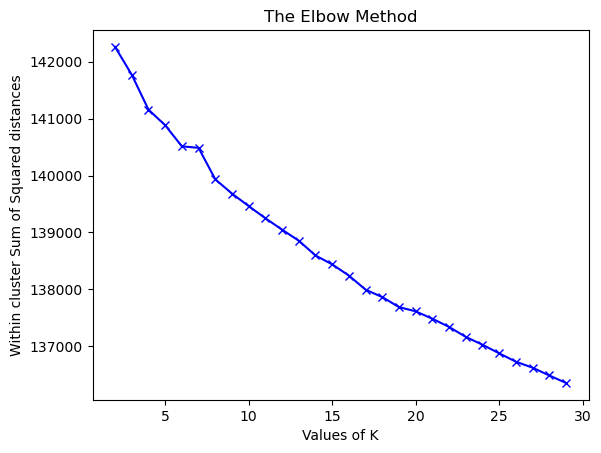

In [53]:
wcss = [] 

for i in range(2, 30): 
    kmeans = KMeans(n_clusters = i,n_init= 'auto', random_state = 0)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
    
K = range(2, 30)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Values of K')

plt.ylabel('Within cluster Sum of Squared distances')
plt.title('The Elbow Method')
plt.show()